# D30 Dataset

In [ ]:
library(ArchR)
library(parallel)
library(BSgenome.Mmusculus.UCSC.mm10)
library(ggpubr)
library(dplyr)
library(ggplot2)

addArchRGenome("mm10")

set.seed(147)

Loading required package: ggplot2

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats

In [2]:
proj <- loadArchRProject('/data/peer/sotougl/Fuchs/inflammatory_memory/scATAC/intermediate_outputs3/projects/ArchR_D30')
proj

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

class: ArchRProject 
outputDirectory: /lila/data/peer/sotougl/Fuchs/inflammatory_memory/scATAC/intermediate_outputs3/projects/ArchR_D30 
samples(2): D30_Ctrl D30_PIMQ
sampleColData names(1): ArrowFiles
cellColData names(15): Sample TSSEnrichment ... DoubletEnrichment
  BlacklistRatio
numberOfCells(1): 28031
medianTSS(1): 14.851
medianFrags(1): 8275

In [3]:
proj@projectMetadata$outputDirectory = '/data/peer/sotougl/Fuchs/inflammatory_memory/scATAC/intermediate_outputs3/projects/ArchR_D30_epdsc'
proj@projectMetadata$outputDirectory

[1] "/data/peer/sotougl/Fuchs/inflammatory_memory/scATAC/intermediate_outputs3/projects/ArchR_D30_epdsc"

## Removing immune cells

In [ ]:
proj <- addTileMatrix(proj, force=TRUE)

proj <- addIterativeLSI(ArchRProj = proj,
                        useMatrix = "TileMatrix",
                        name = "IterativeLSI",
                        iterations = 2,
                        clusterParams = list(resolution = 0.2,
                                             sampleCells = 10000,
                                             n.start = 10),
                        varFeatures = 25000,
                        dimsToUse = 1:30, 
                        force=TRUE)


# Gene scores restricted to LSI-selected variable tiles
# Artificial blacklist to exclude non-variable tiles
chrom_sizes <- getChromSizes(proj)
lsi_features <- proj@reducedDims[["IterativeLSI"]]$LSIFeatures
lsi_feature_gr <- GRanges(lsi_features$seqnames, IRanges(lsi_features$start, lsi_features$start + 500))
blacklist <- IRanges::setdiff(chrom_sizes, lsi_feature_gr)
proj <- addGeneScoreMatrix(proj, matrixName='GeneScoreMatrix', force=TRUE, blacklist=blacklist)


# Cluster and embed on NFR fragments
proj <- addClusters(input = proj, reducedDims = "IterativeLSI", resolution = 0.2, force = TRUE)

# UMAP embedding
proj <- addUMAP(ArchRProj = proj,
                reducedDims = "IterativeLSI",
                name = "UMAP",
                nNeighbors = 30,
                minDist = 0.5,
                metric = "cosine", force = TRUE)

# Plot UMAP with sample/cluster labels and Ptprc gene score
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", size = 0.1, rastr = TRUE, 
                    name = "Sample", embedding = "UMAP", labelSize = 0)
p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", size = 0.1, rastr = TRUE,
                    name = "Clusters", embedding = "UMAP", labelSize = 0)
p3 <- plotEmbedding(ArchRProj = proj, colorBy = 'GeneScoreMatrix', name = 'Ptprc', embedding = "UMAP",
                    imputeWeights = getImputeWeights(proj), colorLimit = NULL, plotAs = "points")

ggsave('../intermediate_outputs3/plots/step01_D30_all_cells.pdf', ggarrange(p1,p2,p3))
ggarrange(p1, p2, p3)

Warning message in min(abs(c(input%%1, input%%1 - 1)), na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
ArchR logging to : ArchRLogs/ArchR-addTileMatrix-163cc44db803-Date-2025-01-04_Time-21-20-42.351491.log
If there is an issue, please report to github with logFile!

2025-01-04 21:20:42.768994 : Batch Execution w/ safelapply!, 0 mins elapsed.

Warning message in min(abs(c(input%%1, input%%1 - 1)), na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
.createArrowGroup : Arrow Group already exists! Dropping Group from ArrowFile! This will take ~10-30 seconds!

.dropGroupsFromArrow : Initializing Temp ArrowFile

.dropGroupsFromArrow : Adding Metadata to Temp ArrowFile

.dropGroupsFromArrow : Adding SubGroups to Temp ArrowFile

.dropGroupsFromArrow : Move Temp ArrowFile to ArrowFile

2025-01-04 21:21:07.460328 : Adding TileMatrix to D30_PIMQ for Chr (1 of 20)!, 0.165 mins elapsed.

2025-01-04 21:21:16.130325 : Adding TileMatrix to D30_PIMQ for Chr (2 of 20)!, 0.31


************************************************************
2025-01-04 21:26:32.344727 : ERROR Found in .saveIteration for  
LogFile = ArchRLogs/ArchR-addIterativeLSI-163cc6256a95f-Date-2025-01-04_Time-21-24-36.570394.log

<simpleError in g$grobs[[legend]]: no such index at level 2
>

************************************************************



2025-01-04 21:26:32.34755 : Creating Cluster Matrix on the total Group Features, 1.926 mins elapsed.

2025-01-04 21:27:09.466897 : Computing Variable Features, 2.545 mins elapsed.

###########
2025-01-04 21:27:09.586873 : Running LSI (2 of 2) on Variable Features, 2.547 mins elapsed.
###########

2025-01-04 21:27:09.606919 : Creating Partial Matrix, 2.547 mins elapsed.

2025-01-04 21:27:49.864527 : Computing LSI, 3.218 mins elapsed.

2025-01-04 21:30:01.013187 : Finished Running IterativeLSI, 5.404 mins elapsed.

ArchR logging to : ArchRLogs/ArchR-addGeneScoreMatrix-163cc7cce0434-Date-2025-01-04_Time-21-30-01.148885.log
If there is an issue, please report to github with logFile!

2025-01-04 21:30:01.282477 : Batch Execution w/ safelapply!, 0 mins elapsed.

.createArrowGroup : Arrow Group already exists! Dropping Group from ArrowFile! This will take ~10-30 seconds!

.dropGroupsFromArrow : Initializing Temp ArrowFile

.dropGroupsFromArrow : Adding Metadata to Temp ArrowFile

.dropGroupsF

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 28031
Number of edges: 945883

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9331
Number of communities: 23
Elapsed time: 3 seconds


15 singletons identified. 8 final clusters.

2025-01-04 21:36:08.733613 : Testing Outlier Clusters, 0.507 mins elapsed.

2025-01-04 21:36:08.737549 : Assigning Cluster Names to 8 Clusters, 0.507 mins elapsed.

2025-01-04 21:36:08.823351 : Finished addClusters, 0.508 mins elapsed.

21:36:08 UMAP embedding parameters a = 0.583 b = 1.334

21:36:08 Read 28031 rows and found 30 numeric columns

21:36:08 Using Annoy for neighbor search, n_neighbors = 30

21:36:08 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

21:36:12 Writing NN index file to temp file /scratch/lsftmp/11530346.tmpdir/RtmpUwzj1S/file163cc26f26e84

21:36:12 Searching Annoy index using 64 threads, search_k = 3000

21:36:16 Annoy recall = 100%

21:36:17 Commencing smooth kNN distance calibration using 64 thread

In [5]:
sprintf( 'number of cells: %s ', nCells(proj))

[1] "number of cells: 28031 "

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-163cc34392eac-Date-2025-01-04_Time-21-37-17.057927.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-163cc34392eac-Date-2025-01-04_Time-21-37-17.057927.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-163cc746f792b-Date-2025-01-04_Time-21-37-17.372315.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-163cc746f792b-Date-2025-01-04_Time-21-37-17.372315.log

Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-163cc20592d93-Date-2025-01-04_Time-21-37-17.664604.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matri

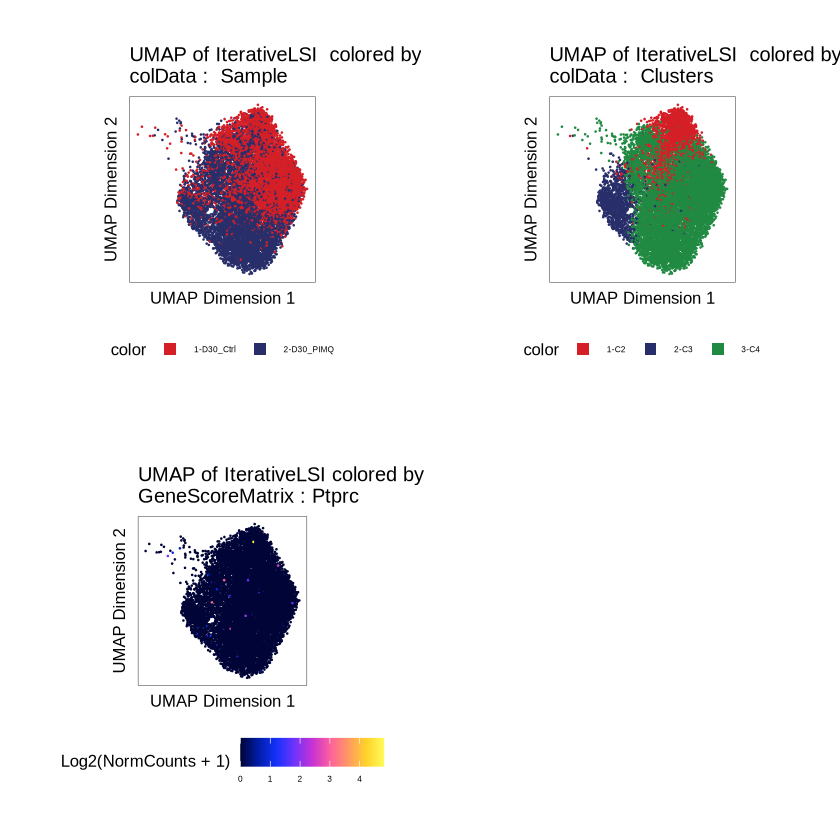

In [ ]:
# Restrict to epithelial stem cell clusters (C2/C3/C4)
epdsc_clusters <- c("C2", "C3", "C4")
epdsc_idx <- which(proj$Clusters %in% epdsc_clusters)
epdsc_cells <- proj$cellNames[epdsc_idx]
proj_epdsc <- proj[epdsc_cells,]

# Plot UMAP colored by sample, cluster, and Ptprc gene score
p1 <- plotEmbedding(ArchRProj = proj_epdsc, colorBy = "cellColData", size = 0.1, rastr = TRUE, 
                    name = "Sample", embedding = "UMAP", labelSize = 0)
p2 <- plotEmbedding(ArchRProj = proj_epdsc, colorBy = "cellColData", size = 0.1, rastr = TRUE,
                    name = "Clusters", embedding = "UMAP", labelSize = 0)
p3 <- plotEmbedding(ArchRProj = proj_epdsc, colorBy = 'GeneScoreMatrix', name = 'Ptprc', embedding = "UMAP",
                    imputeWeights = getImputeWeights(proj_epdsc), colorLimit = NULL, plotAs = "points")
ggsave('../intermediate_outputs3/plots/step01_D30_epdsc_cells.pdf', ggarrange(p1,p2,p3))
ggarrange(p1, p2, p3)


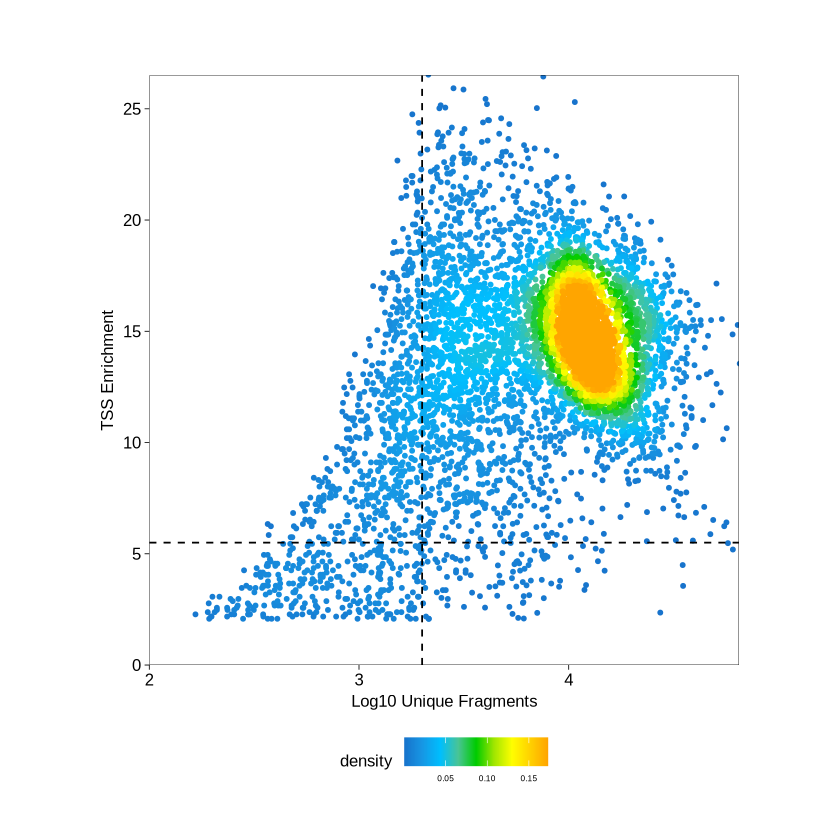

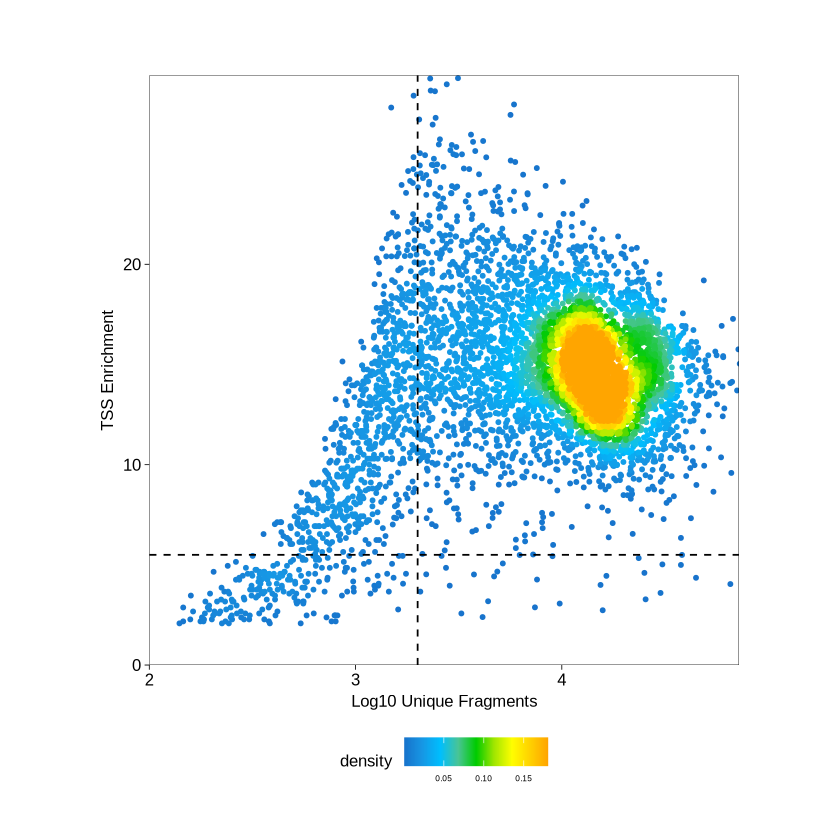

In [ ]:
# QC scatterplots per sample (log10 fragments vs TSS enrichment)
df <- getCellColData(proj_epdsc[proj_epdsc$Sample == 'D30_Ctrl'], select = c("log10(nFrags)", "TSSEnrichment"))
ggPoint(
    x = df[,1], 
    y = df[,2], 
    colorDensity = TRUE,
    continuousSet = "sambaNight",
    xlabel = "Log10 Unique Fragments",
    ylabel = "TSS Enrichment",
    xlim = c(log10(100), quantile(df[,1], probs = 0.999)),
    ylim = c(0, quantile(df[,2], probs = 0.999))
) + geom_hline(yintercept = 5.5, lty = "dashed") + geom_vline(xintercept = log10(2000), lty = "dashed")

df <- getCellColData(proj_epdsc[proj_epdsc$Sample == 'D30_PIMQ'], select = c("log10(nFrags)", "TSSEnrichment"))
ggPoint(
    x = df[,1], 
    y = df[,2], 
    colorDensity = TRUE,
    continuousSet = "sambaNight",
    xlabel = "Log10 Unique Fragments",
    ylabel = "TSS Enrichment",
    xlim = c(log10(100), quantile(df[,1], probs = 0.999)),
    ylim = c(0, quantile(df[,2], probs = 0.999))
) + geom_hline(yintercept = 5.5, lty = "dashed") + geom_vline(xintercept = log10(2000), lty = "dashed")

In [ ]:
# Apply TSS enrichment and fragment count thresholds
sprintf( 'number of cells: %s ', nCells(proj_epdsc))
idxPass <- which(proj_epdsc$TSSEnrichment >= 5.5)
cellsPass <- proj_epdsc$cellNames[idxPass]
proj_epdsc <- proj_epdsc[cellsPass, ]
sprintf( 'number of cells: %s ', nCells(proj_epdsc))
idxPass <- which(proj_epdsc$nFrags >= 2000)
cellsPass <- proj_epdsc$cellNames[idxPass]
proj_epdsc <- proj_epdsc[cellsPass, ]
sprintf( 'number of cells: %s ', nCells(proj_epdsc))

[1] "number of cells: 12971 "

[1] "number of cells: 12333 "

[1] "number of cells: 11046 "

In [ ]:
# Cell counts per sample after QC
proj_epdsc@cellColData %>% as.data.frame() %>% group_by(Sample) %>% summarize(n = n())

Sample,n
<chr>,<int>
D30_Ctrl,5403
D30_PIMQ,5643


In [ ]:
# Persist filtered project
proj_epdsc <- saveArchRProject(ArchRProj = proj_epdsc)

Copying Arrow Files...

Copying Arrow Files (1 of 2)

Copying Arrow Files (2 of 2)

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `

# Filter Doublets

In [ ]:
# Doublet detection and filtering
proj_epdsc <- addDoubletScores(
  input = proj_epdsc,
  k = 10, # Number of nearest neighbors for pseudo-doublet scoring
  knnMethod = "UMAP", # Embedding used for kNN search
  LSIMethod = 1
)

proj_epdsc <- filterDoublets(proj_epdsc)

ArchR logging to : ArchRLogs/ArchR-addDoubletScores-163cc6a7193e4-Date-2025-01-04_Time-21-39-24.383062.log
If there is an issue, please report to github with logFile!

2025-01-04 21:39:24.501375 : Batch Execution w/ safelapply!, 0 mins elapsed.

2025-01-04 21:39:24.507766 : D30_PIMQ (1 of 2) :  Computing Doublet Statistics, 0 mins elapsed.

Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
D30_PIMQ (1 of 2) : UMAP Projection R^2 = 0.84006

D30_PIMQ (1 of 2) : UMAP Projection R^2 = 0.84006



Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.
ℹ The deprecated feature was likely used in the ArchR package.
  Please report the issue to the authors.”





************************************************************
2025-01-04 21:43:28.029945 : ERROR Found in ggplot for D30_PIMQ (1 of 2) :  
LogFile = ArchRLogs/ArchR-addDoubletScores-163cc6a7193e4-Date-2025-01-04_Time-21-39-24.383062.log

<simpleError in g$grobs[[legend]]: no such index at level 2
>

************************************************************



2025-01-04 21:43:28.075997 : D30_Ctrl (2 of 2) :  Computing Doublet Statistics, 4.06 mins elapsed.

Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
D30_Ctrl (2 of 2) : UMAP Projection R^2 = 0.76538

D30_Ctrl (2 of 2) : UMAP Projection R^2 = 0.76538

D30_Ctrl (2 of 2) : Correlation of UMAP Projection is below 0.9 (normally this is ~0.99)
This means there is little heterogeneity in your sample and thus doubletCalling is inaccurate.
force = FALSE, thus returning -1 doubletScores and doubletEnrichments!
Set force = TRUE if you want to continue (not recommended).

D30_Ctrl (2 of 2) : Correlation of UMAP Projection is below 0.9 (normally this is ~0.99)
This means there is little heterogeneity in your sample and thus doubletCalling is inaccurate.
force = FALSE, thus returning -1 doubletScores and doubletEnrichments!
Set force = TRUE if you want to continue (not recommended).








************************************************************
2025-01-04 21:46:42.435369 : ERROR Found in ggplot for D30_Ctrl (2 of 2) :  
LogFile = ArchRLogs/ArchR-addDoubletScores-163cc6a7193e4-Date-2025-01-04_Time-21-39-24.383062.log

<simpleError in g$grobs[[legend]]: no such index at level 2
>

************************************************************



ArchR logging successful to : ArchRLogs/ArchR-addDoubletScores-163cc6a7193e4-Date-2025-01-04_Time-21-39-24.383062.log

Filtering 318 cells from ArchRProject!

	D30_Ctrl : 0 of 5403 (0%)

	D30_PIMQ : 318 of 5643 (5.6%)



In [ ]:
# Recompute LSI/UMAP on filtered EpdSC subset
proj_epdsc <- addIterativeLSI(ArchRProj = proj_epdsc,
                        useMatrix = "TileMatrix",
                        name = "IterativeLSI",
                        iterations = 3,
                        seed = 1,
                        clusterParams = list(resolution = c(0.2, 0.5),
                                             sampleCells = 10000,
                                             n.start = 10),
                        varFeatures = 20000,
                        dimsToUse = 1:30, force = TRUE)

# Clustering on LSI
proj_epdsc <- addClusters(input = proj_epdsc,
                    reducedDims = "IterativeLSI",
                    method = "Seurat",
                    name = "Clusters",
                    resolution = 0.2, force = TRUE)

# UMAP embedding
proj_epdsc <- addUMAP(ArchRProj = proj_epdsc,
                reducedDims = "IterativeLSI",
                name = "UMAP",
                nNeighbors = 30,
                minDist = 0.5,
                metric = "cosine", force = TRUE)

# Visualize clusters, samples, and Krt14 accessibility
p1 = plotEmbedding(ArchRProj = proj_epdsc, colorBy = "cellColData", size = 0.1, rastr = TRUE,
                    name = "Clusters", embedding = "UMAP", labelSize = 0)
p2 = plotEmbedding(ArchRProj = proj_epdsc, colorBy = "cellColData", size = 0.1, rastr = TRUE,
                    name = "Sample", embedding = "UMAP", labelSize = 0)
p3 <- plotEmbedding(ArchRProj = proj_epdsc, colorBy = 'GeneScoreMatrix', name = 'Krt14', embedding = "UMAP",
                    imputeWeights = getImputeWeights(proj_epdsc), colorLimit = NULL, plotAs = "points")

ggsave('../intermediate_outputs3/plots/step01_D30_epdsc_cells_reembedding.pdf', ggarrange(p1,p2,p3))
ggarrange(p1, p2, p3)

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-163cc32a0e2e8-Date-2025-01-04_Time-21-46-42.617054.log
If there is an issue, please report to github with logFile!

2025-01-04 21:46:42.914257 : Computing Total Across All Features, 0.002 mins elapsed.

2025-01-04 21:46:43.72599 : Computing Top Features, 0.015 mins elapsed.

###########
2025-01-04 21:46:45.025128 : Running LSI (1 of 3) on Top Features, 0.037 mins elapsed.
###########

2025-01-04 21:46:45.07586 : Sampling Cells (N = 10001) for Estimated LSI, 0.038 mins elapsed.

2025-01-04 21:46:45.078627 : Creating Sampled Partial Matrix, 0.038 mins elapsed.

2025-01-04 21:47:02.74158 : Computing Estimated LSI (projectAll = FALSE), 0.332 mins elapsed.

2025-01-04 21:48:22.263946 : Identifying Clusters, 1.657 mins elapsed.

Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
2025-01-04 21:48:33.877716 : Identified 2 Clusters, 1.851 mins elapsed.

2025-01-04 21:48:33.884663 : Saving LSI Iteration, 1.851


************************************************************
2025-01-04 21:48:59.087413 : ERROR Found in .saveIteration for  
LogFile = ArchRLogs/ArchR-addIterativeLSI-163cc32a0e2e8-Date-2025-01-04_Time-21-46-42.617054.log

<simpleError in g$grobs[[legend]]: no such index at level 2
>

************************************************************



2025-01-04 21:48:59.08991 : Creating Cluster Matrix on the total Group Features, 2.271 mins elapsed.

2025-01-04 21:49:39.667961 : Computing Variable Features, 2.947 mins elapsed.

###########
2025-01-04 21:49:39.754027 : Running LSI (2 of 3) on Variable Features, 2.949 mins elapsed.
###########

2025-01-04 21:49:39.804427 : Sampling Cells (N = 10001) for Estimated LSI, 2.95 mins elapsed.

2025-01-04 21:49:39.80723 : Creating Sampled Partial Matrix, 2.95 mins elapsed.

2025-01-04 21:49:55.75297 : Computing Estimated LSI (projectAll = FALSE), 3.215 mins elapsed.

2025-01-04 21:50:36.054902 : Identifying Clusters, 3.887 mins elapsed.

Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
2025-01-04 21:50:48.149119 : Identified 7 Clusters, 4.089 mins elapsed.

2025-01-04 21:50:48.156074 : Saving LSI Iteration, 4.089 mins elapsed.






************************************************************
2025-01-04 21:51:12.218412 : ERROR Found in .saveIteration for  
LogFile = ArchRLogs/ArchR-addIterativeLSI-163cc32a0e2e8-Date-2025-01-04_Time-21-46-42.617054.log

<simpleError in g$grobs[[legend]]: no such index at level 2
>

************************************************************



2025-01-04 21:51:12.891011 : Creating Cluster Matrix on the total Group Features, 4.501 mins elapsed.

2025-01-04 21:51:54.189671 : Computing Variable Features, 5.189 mins elapsed.

###########
2025-01-04 21:51:54.360432 : Running LSI (3 of 3) on Variable Features, 5.192 mins elapsed.
###########

2025-01-04 21:51:54.378183 : Creating Partial Matrix, 5.193 mins elapsed.

2025-01-04 21:52:12.840302 : Computing LSI, 5.5 mins elapsed.

2025-01-04 21:53:32.032923 : Finished Running IterativeLSI, 6.82 mins elapsed.

ArchR logging to : ArchRLogs/ArchR-addClusters-163ccb62e737-Date-2025-01-04_Time-21-53-32.042632.log
If there is an issue, please report to github with logFile!

Overriding previous entry for Clusters

2025-01-04 21:53:32.218316 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.001 mins elapsed.

Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10728
Number of edges: 462220

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8949
Number of communities: 4
Elapsed time: 1 seconds


2025-01-04 21:53:43.826105 : Testing Outlier Clusters, 0.194 mins elapsed.

2025-01-04 21:53:43.831849 : Assigning Cluster Names to 4 Clusters, 0.195 mins elapsed.

2025-01-04 21:53:43.867189 : Finished addClusters, 0.195 mins elapsed.

21:53:43 UMAP embedding parameters a = 0.583 b = 1.334

21:53:43 Read 10728 rows and found 30 numeric columns

21:53:43 Using Annoy for neighbor search, n_neighbors = 30

21:53:43 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

21:53:44 Writing NN index file to temp file /scratch/lsftmp/11530346.tmpdir/RtmpUwzj1S/file163cc73af9bb0

21:53:44 Searching Annoy index using 64 threads, search_k = 3000

21:53:46 Annoy recall = 100%

21:53:47 Commencing smooth kNN distance calibration using 64 threads
 with target n_neighbors = 30

21:53:48 Ini

In [ ]:
# Alternative LSI with more features (kept for comparison)
proj_epdsc <- addIterativeLSI(ArchRProj = proj_epdsc,
                        useMatrix = "TileMatrix",
                        name = "IterativeLSI2",
                        iterations = 3,
                        seed = 1,
                        clusterParams = list(resolution = c(0.2, 0.5),
                                             sampleCells = 10000,
                                             n.start = 10),
                        varFeatures = 50000,
                        dimsToUse = 1:30, force = TRUE)

# Clustering using IterativeLSI2
proj_epdsc <- addClusters(input = proj_epdsc,
                    reducedDims = "IterativeLSI2",
                    method = "Seurat",
                    name = "Clusters",
                    resolution = 0.2, force = TRUE)

# UMAP using IterativeLSI2
proj_epdsc <- addUMAP(ArchRProj = proj_epdsc,
                reducedDims = "IterativeLSI2",
                name = "UMAP",
                nNeighbors = 30,
                minDist = 0.5,
                metric = "cosine", force = TRUE)

plotEmbedding(ArchRProj = proj_epdsc, colorBy = "cellColData", size = 0.1, rastr = TRUE,
                    name = "Clusters", embedding = "UMAP", labelSize = 0)
plotEmbedding(ArchRProj = proj_epdsc, colorBy = "cellColData", size = 0.1, rastr = TRUE,
                    name = "Sample", embedding = "UMAP", labelSize = 0)


Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-163cc454019c9-Date-2025-01-04_Time-21-54-11.990167.log
If there is an issue, please report to github with logFile!

2025-01-04 21:54:12.181364 : Computing Total Across All Features, 0.001 mins elapsed.

2025-01-04 21:54:12.9782 : Computing Top Features, 0.014 mins elapsed.

###########
2025-01-04 21:54:14.291478 : Running LSI (1 of 3) on Top Features, 0.036 mins elapsed.
###########

2025-01-04 21:54:14.34224 : Sampling Cells (N = 10001) for Estimated LSI, 0.037 mins elapsed.

2025-01-04 21:54:14.345045 : Creating Sampled Partial Matrix, 0.037 mins elapsed.

2025-01-04 21:54:39.320237 : Computing Estimated LSI (projectAll = FALSE), 0.453 mins elapsed.

2025-01-04 21:56:59.283372 : Identifying Clusters, 2.786 mins elapsed.

Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
2025-01-04 21:57:11.439055 : Identified 3 Clusters, 2.989 mins elapsed.

2025-01-04 21:57:11.446037 : Saving LSI Iteration, 2.989


************************************************************
2025-01-04 21:57:35.648889 : ERROR Found in .saveIteration for  
LogFile = ArchRLogs/ArchR-addIterativeLSI-163cc454019c9-Date-2025-01-04_Time-21-54-11.990167.log

<simpleError in g$grobs[[legend]]: no such index at level 2
>

************************************************************



2025-01-04 21:57:35.651348 : Creating Cluster Matrix on the total Group Features, 3.392 mins elapsed.

2025-01-04 21:58:18.282365 : Computing Variable Features, 4.103 mins elapsed.

###########
2025-01-04 21:58:18.385358 : Running LSI (2 of 3) on Variable Features, 4.104 mins elapsed.
###########

2025-01-04 21:58:18.436362 : Sampling Cells (N = 10001) for Estimated LSI, 4.105 mins elapsed.

2025-01-04 21:58:18.439139 : Creating Sampled Partial Matrix, 4.105 mins elapsed.

2025-01-04 21:58:38.833163 : Computing Estimated LSI (projectAll = FALSE), 4.445 mins elapsed.

2025-01-04 22:00:36.858436 : Identifying Clusters, 6.412 mins elapsed.

Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
2025-01-04 22:00:48.571146 : Identified 7 Clusters, 6.607 mins elapsed.

2025-01-04 22:00:48.577529 : Saving LSI Iteration, 6.608 mins elapsed.






************************************************************
2025-01-04 22:01:12.174581 : ERROR Found in .saveIteration for  
LogFile = ArchRLogs/ArchR-addIterativeLSI-163cc454019c9-Date-2025-01-04_Time-21-54-11.990167.log

<simpleError in g$grobs[[legend]]: no such index at level 2
>

************************************************************



2025-01-04 22:01:12.845855 : Creating Cluster Matrix on the total Group Features, 7.012 mins elapsed.

2025-01-04 22:01:55.522989 : Computing Variable Features, 7.723 mins elapsed.

###########
2025-01-04 22:01:55.696405 : Running LSI (3 of 3) on Variable Features, 7.726 mins elapsed.
###########

2025-01-04 22:01:55.714041 : Creating Partial Matrix, 7.727 mins elapsed.

2025-01-04 22:02:20.167378 : Computing LSI, 8.134 mins elapsed.

2025-01-04 22:03:29.702635 : Finished Running IterativeLSI, 9.293 mins elapsed.

ArchR logging to : ArchRLogs/ArchR-addClusters-163cc6510125d-Date-2025-01-04_Time-22-03-29.710637.log
If there is an issue, please report to github with logFile!

Overriding previous entry for Clusters

2025-01-04 22:03:29.875142 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.001 mins elapsed.

Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10728
Number of edges: 420414

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8977
Number of communities: 4
Elapsed time: 1 seconds


2025-01-04 22:03:41.415939 : Testing Outlier Clusters, 0.193 mins elapsed.

2025-01-04 22:03:41.421093 : Assigning Cluster Names to 4 Clusters, 0.193 mins elapsed.

2025-01-04 22:03:41.455775 : Finished addClusters, 0.194 mins elapsed.

22:03:41 UMAP embedding parameters a = 0.583 b = 1.334

22:03:41 Read 10728 rows and found 30 numeric columns

22:03:41 Using Annoy for neighbor search, n_neighbors = 30

22:03:41 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

22:03:42 Writing NN index file to temp file /scratch/lsftmp/11530346.tmpdir/RtmpUwzj1S/file163cc328ff67e

22:03:42 Searching Annoy index using 64 threads, search_k = 3000

22:03:43 Annoy recall = 100%

22:03:44 Commencing smooth kNN distance calibration using 64 threads
 with target n_neighbors = 30

22:03:45 Ini

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-163cc519caed6-Date-2025-01-04_Time-22-04-06.171409.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-163cc519caed6-Date-2025-01-04_Time-22-04-06.171409.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-163cc1899af4-Date-2025-01-04_Time-22-04-06.798689.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-163cc1899af4-Date-2025-01-04_Time-22-04-06.798689.log



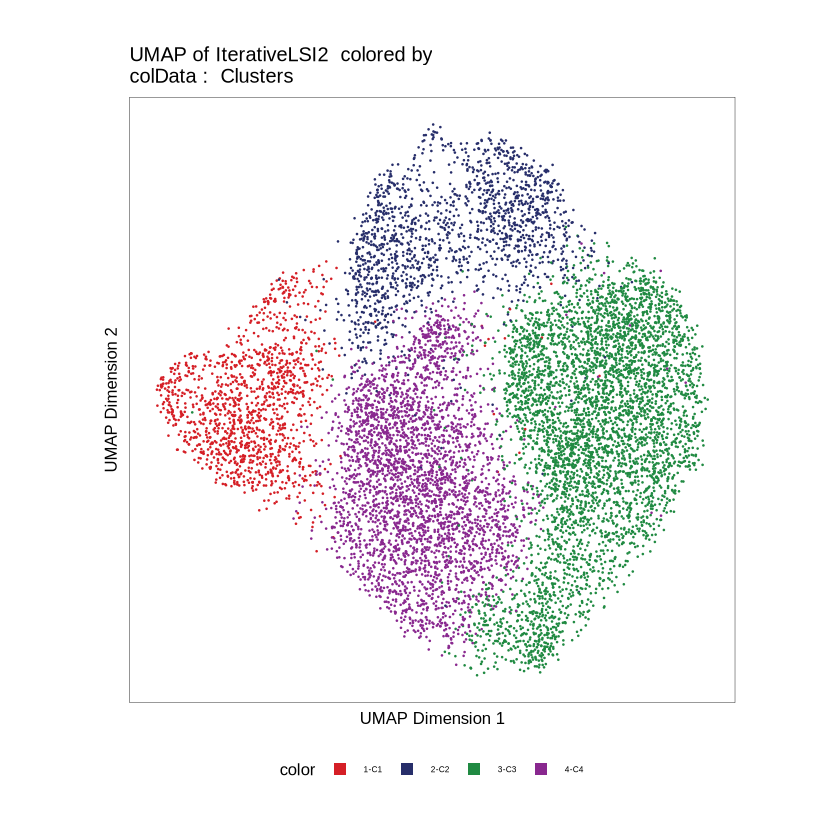

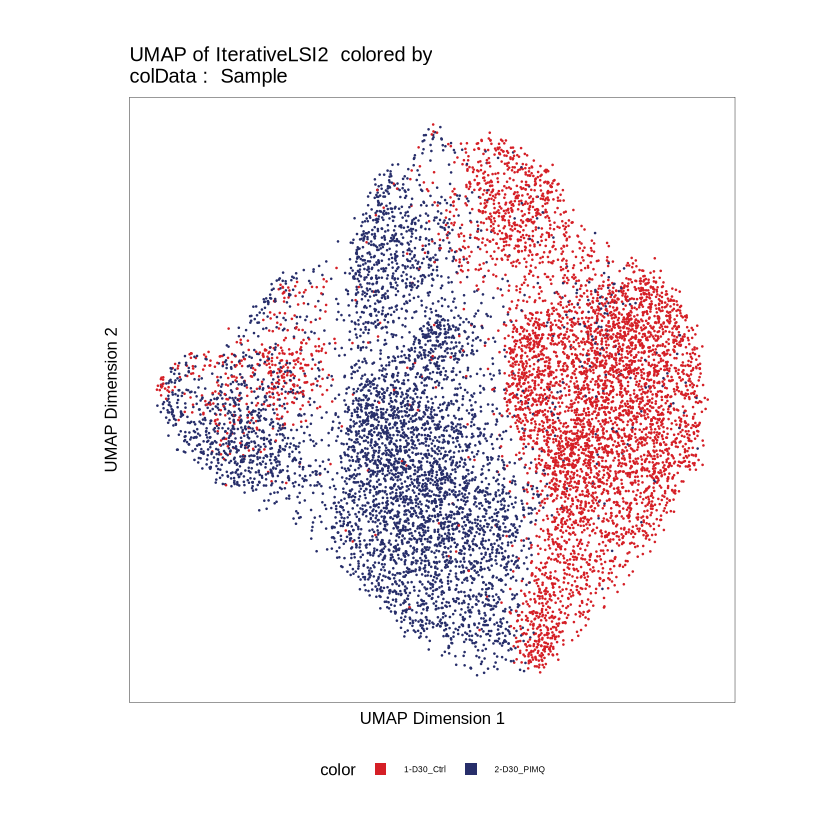

In [ ]:
plotEmbedding(ArchRProj = proj_epdsc, colorBy = "cellColData", size = 0.1, rastr = TRUE,
                    name = "Clusters", embedding = "UMAP", labelSize = 0)
plotEmbedding(ArchRProj = proj_epdsc, colorBy = "cellColData", size = 0.1, rastr = TRUE,
                    name = "Sample", embedding = "UMAP", labelSize = 0)

Chose the original IterativeLSI parameter set for downstream analyses.

ArchR logging to : ArchRLogs/ArchR-addClusters-163cc4d3e3c6a-Date-2025-01-04_Time-22-05-10.208593.log
If there is an issue, please report to github with logFile!

Overriding previous entry for Clusters

2025-01-04 22:05:10.370035 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.001 mins elapsed.

Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10728
Number of edges: 462220

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8949
Number of communities: 4
Elapsed time: 1 seconds


2025-01-04 22:05:21.936299 : Testing Outlier Clusters, 0.194 mins elapsed.

2025-01-04 22:05:21.941554 : Assigning Cluster Names to 4 Clusters, 0.194 mins elapsed.

2025-01-04 22:05:21.978474 : Finished addClusters, 0.194 mins elapsed.

22:05:21 UMAP embedding parameters a = 0.583 b = 1.334

22:05:21 Read 10728 rows and found 30 numeric columns

22:05:21 Using Annoy for neighbor search, n_neighbors = 30

22:05:22 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

22:05:23 Writing NN index file to temp file /scratch/lsftmp/11530346.tmpdir/RtmpUwzj1S/file163cc4024bebe

22:05:23 Searching Annoy index using 64 threads, search_k = 3000

22:05:24 Annoy recall = 100%

22:05:25 Commencing smooth kNN distance calibration using 64 threads
 with target n_neighbors = 30

22:05:26 Ini

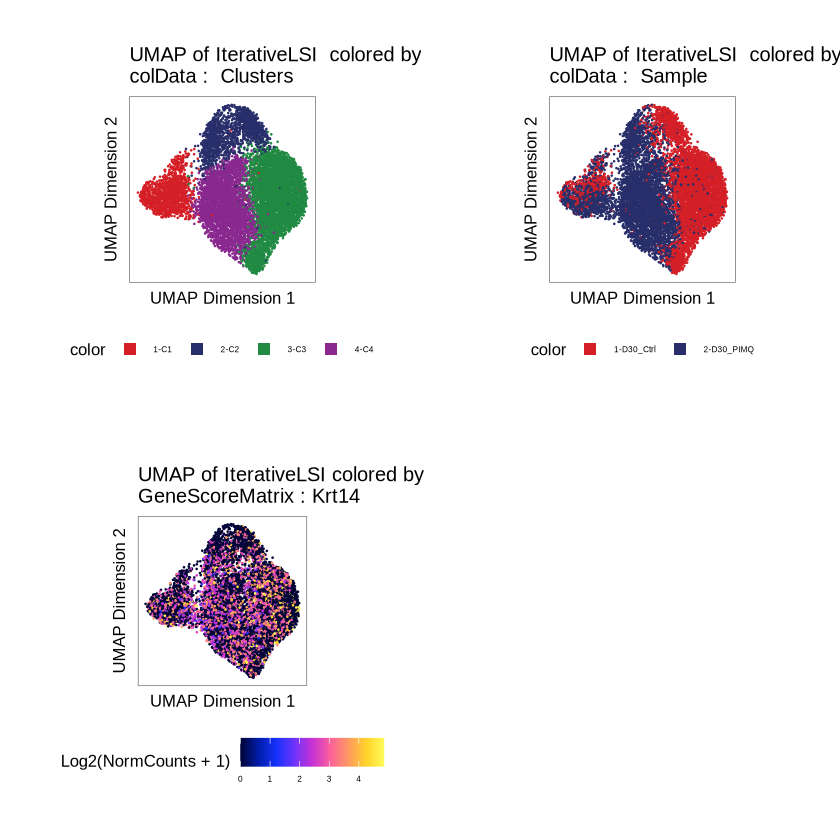

In [ ]:
# Original IterativeLSI parameter set retained for reference
## If needed, re-run this block by uncommenting the next lines
## proj_epdsc <- addIterativeLSI(ArchRProj = proj_epdsc,
##                        useMatrix = "TileMatrix",
##                        name = "IterativeLSI",
##                        iterations = 3,
##                        seed = 1,
##                        clusterParams = list(resolution = c(0.2, 0.5),
##                                             sampleCells = 10000,
##                                             n.start = 10),
##                        varFeatures = 20000,
##                        dimsToUse = 1:30, force = TRUE)

# Clustering with the chosen IterativeLSI
proj_epdsc <- addClusters(input = proj_epdsc,
                    reducedDims = "IterativeLSI",
                    method = "Seurat",
                    name = "Clusters",
                    resolution = 0.2, force = TRUE)

# UMAP with the chosen IterativeLSI
proj_epdsc <- addUMAP(ArchRProj = proj_epdsc,
                reducedDims = "IterativeLSI",
                name = "UMAP",
                nNeighbors = 30,
                minDist = 0.5,
                metric = "cosine", force = TRUE)

p1 = plotEmbedding(ArchRProj = proj_epdsc, colorBy = "cellColData", size = 0.1, rastr = TRUE,
                    name = "Clusters", embedding = "UMAP", labelSize = 0)
p2 = plotEmbedding(ArchRProj = proj_epdsc, colorBy = "cellColData", size = 0.1, rastr = TRUE,
                    name = "Sample", embedding = "UMAP", labelSize = 0)
p3 <- plotEmbedding(ArchRProj = proj_epdsc, colorBy = 'GeneScoreMatrix', name = 'Krt14', embedding = "UMAP",
                    imputeWeights = getImputeWeights(proj_epdsc), colorLimit = NULL, plotAs = "points")

ggsave('../intermediate_outputs3/plots/step03_D30_epdsc_cells_reembedding.pdf', ggarrange(p1,p2,p3))
ggarrange(p1, p2, p3)

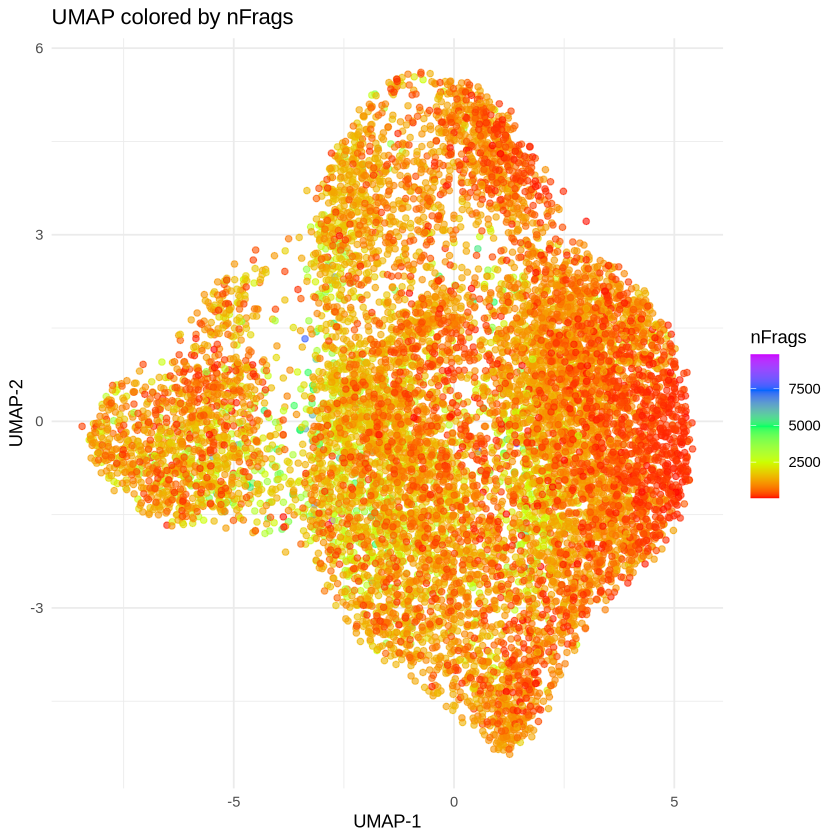

In [ ]:
umapEmbeddings <- getEmbedding(proj_epdsc, "UMAP")

cellData <- getCellColData(proj_epdsc)
reads_in_tss <- cellData$ReadsInTSS

# Prepare data frame for coloring UMAP by reads overlapping TSS
plotData <- data.frame(UMAP1 = umapEmbeddings[,1], UMAP2 = umapEmbeddings[,2], reads_in_tss = reads_in_tss)

ggplot(plotData, aes(x = UMAP1, y = UMAP2, color = reads_in_tss)) +
  geom_point(alpha = 0.6) +
  scale_color_gradientn(colors = rainbow(5)) +
  labs(title = "UMAP colored by ReadsInTSS", x = "UMAP-1", y = "UMAP-2", color = "Reads in TSS") +
  theme_minimal() 

In [ ]:
proj_epdsc <- saveArchRProject(ArchRProj = proj_epdsc)

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         

In [ ]:
proj_epdsc@cellColData %>% as.data.frame() %>% group_by(Sample) %>% summarize(n = n())

Sample,n
<chr>,<int>
D30_Ctrl,5403
D30_PIMQ,5325
